## Distribuce dat

### Diskrétní proměnné
#### Binominální distribuce dat
- Má pouze dva možné výsledky.
- Statistický experiment s binominální distribucí má pevný počet pokusů.
- Každý pokus v rámci statistického experimentu musí být nezávislý na ostatních.
- V rámci každého pokusu je zachována stejná pravděpodobnost úspěchu.

**Příklady**: 
- Počet správných odpovědí v testu.
- Výsledek hodů mincí.
- Odpověď na otázku ano/ne.


#### Multinominální distribuce dat
- Má více než dva možné výsledky v rámci pokusu.
- Statistický experiment s multinominální distribucí má pevný počet pokusů.
- Každý pokus v rámci statistického experimentu musí být nezávislý na ostatních.

**Příklady**: 
- Známky ve škole.
- Číslo při hodu kostkou.
- Výběr jednoho ze tří různých produktů.



#### Poissonova distribuce
- Používá se pro počet událostí, které nastanou v pevném časovém nebo prostorovém intervalu.
- Jednotlivé události v rámci experimentu jsou na sobě nezávislé a mají konstantní průměrnou frekvenci.

**Příklady**:
- Počet za den obdržených e-mailů.
- Počet projíždějících aut v určitém časovém pásmu.

### Spojité proměnné

#### Normální (Gaussova) distribuce
- Popisuje rozložení hodnot kolem střední hodnoty, kdy většina hodnot se nachází blízko průměru.

**Příklady**:
- Rozdělení úhrnu srážek v lokalitě.
- Rozdělení teplot v lokalitě.


#### Uniformní distribuce
- Popisuje rozložení hodnot v určitém intervalu, kde pravděpodobnost je stejně rozdělena.

**Příklady**: 
- Náhodný výběr čísla v konkrétním rozsahu.
- Náhodný výběr času mezi 0 - 1 hodinou.

#### Exponenciální distribuce
- Používá se k modelaci času mezi událostmi s konstantní mírou výskytů.
- Typicky se používá k modelování doby čekání na náhodnou proměnnou.

**Příklady z praxe**: 
- Čekání na autobus.
- Doba do selhání elektronické součástky.


#### T-studentova distribuce
- Podobá se normálnímu rozdělení, má však (záměrně) zvýrazněny extrémní hodnoty.
- Používá se v situacích s malým množstvím pozorování, kdy není známa směrodatná odchylka populace.

**Příklady z praxe**: 
- Odhad střední hodnoty na základě malého vzorku (např. průměrná výška dětí v určitém věku).
- Testování hypotéz, výpočet intervalů spolehlivosti, kdy chybí informace o směrodatné odchylce populace.


In [3]:
import math

kombinacni_cislo  = math.factorial(1) / (math.factorial(6) * math.factorial(1))
kombinacni_cislo
                                         

0.001388888888888889

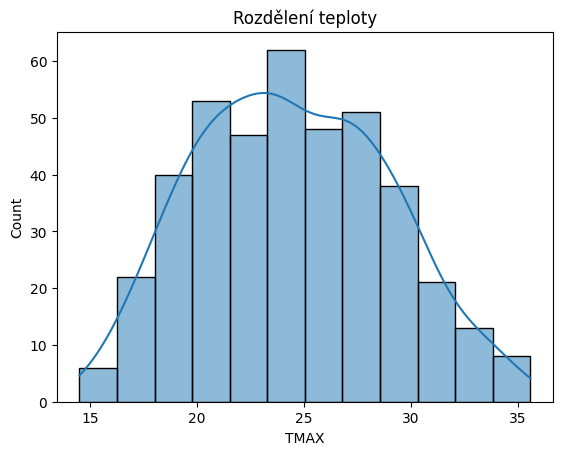

In [16]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv',sep=';')

df['MONTH'] = df['DATE'].apply(lambda x: int(x.split('-')[1]))
data_ruzyne = df[(df['NAME']=='RUZYNE') & (df['MONTH']==7) ]
sns.histplot(data_ruzyne['TMAX'], kde=True)
plt.title('Rozdělení teploty')
plt.show()


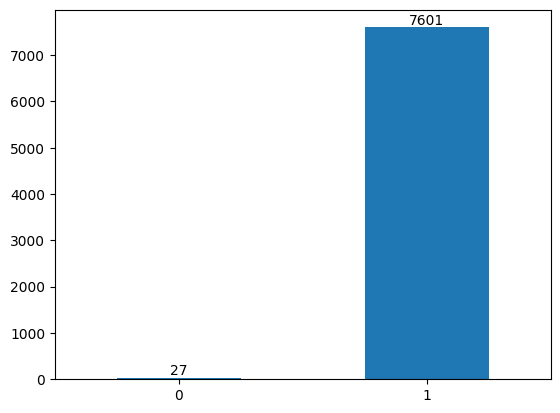

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv',sep=';')


# Prevod DATE na datetime
df['DATE'] = pd.to_datetime(df['DATE'])
# Min DATE pro RUZYNE
ruzyne_min_datum = df[df['NAME']=='RUZYNE']['DATE'].min()
# Max date pro RUZYNE
ruzyne_max_datum = df[df['NAME']=='RUZYNE']['DATE'].max()

# Datumy mezi ruzyne_min_datum a ruzyne_max_datum
df_datumy = pd.date_range(ruzyne_min_datum, ruzyne_max_datum, freq='D').to_frame(index=False, name='DATE')

df_datumy['zaznam'] = df_datumy['DATE'].isin(df[df['NAME'] == 'RUZYNE']['DATE'])

df_datumy = df_datumy.groupby(df_datumy['zaznam'],as_index=False).count()

ax = df_datumy.plot.bar(y='DATE', rot=0, legend=False)
# Přidání popisků hodnot
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

# Zobrazení grafu
plt.show()

